**Cree un programa que ajuste a un polinomio de segundo grado los datos dados en la tabla. El programa debe calcular además el coeficiente de correlación (r):**

x: {0, 1, 2, 3, 4, 5, 6}

y: {3.2, 0.4, -1, -1.4, -1.1, 0.6, 3.1}

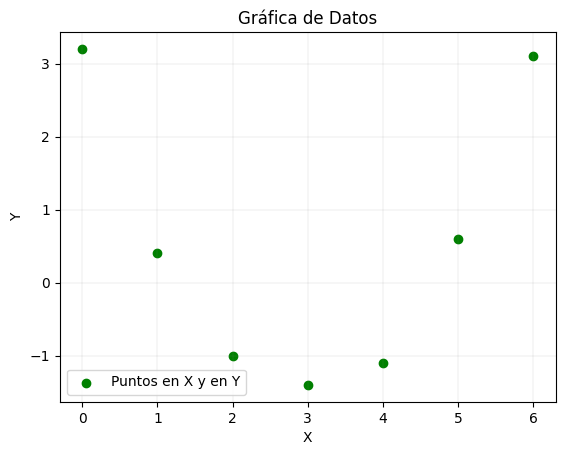

Matriz inicial 1
7 21 91 | 3.8000
21 91 441 | 11.4000
91 441 2275 | 92.8000

División 7
1.0 3.0 13.0 | 0.5429
21 91 441 | 11.4000
91 441 2275 | 92.8000

Reducción 7
1.0 3.0 13.0 | 0.5429
0.0 28.0 168.0 | 0.0000
0.0 168.0 1092.0 | 43.4000

División 28.0
1.0 3.0 13.0 | 0.5429
0.0 1.0 6.0 | 0.0000
0.0 168.0 1092.0 | 43.4000

Reducción 28.0
1.0 0.0 -5.0 | 0.5429
0.0 1.0 6.0 | 0.0000
0.0 0.0 84.0 | 43.4000

División 84.0
1.0 0.0 -5.0 | 0.5429
0.0 1.0 6.0 | 0.0000
0.0 0.0 1.0 | 0.5167

Reducción 84.0
1.0 0.0 0.0 | 3.1262
0.0 1.0 0.0 | -3.1000
0.0 0.0 1.0 | 0.5167

a0 = 3.1262,  a1 = -3.1000,  a2 = 0.5167
y = 3.1262 + -3.1000x + 0.5167x^2

La desviación estándar Sy = 1.935508
El error estándar de estimación Sy/x = 0.133927
El coeficiente de correlación r = 99.9 %


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def imprimir_Sistema(a, b, etiqueta,pivote):
    n = len(b)
    print(etiqueta,pivote)

    for i in range(n):
        for j in range(n):
            print(a[i][j], end = " ")
        print(f"| {b[i]:.4f}")
    print()

def gauss_Jordan(ao, bo):
    a = copy.deepcopy(ao)
    c = copy.copy(bo)
    n = len(b)
    imprimir_Sistema(a, c, "Matriz inicial",1)

    for i in range(n):
        pivote = a[i][i]
        for j in range(n):
          a[i][j] /= pivote
        c[i] /= pivote
        imprimir_Sistema(a, c, "División",pivote)

        for k in range(n):
          if i != k:
            valor_aux = -a[k][i]
            for j in range(n):
              a[k][j] += a[i][j] * valor_aux
            c[k] += c[i] * valor_aux
        imprimir_Sistema(a, c, "Reducción",pivote)

    return c
    return pivote


x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([3.2, 0.4, -1, -1.4, -1.1, 0.6, 3.1])

plt.scatter(x, y, color='Green', label='Puntos en X y en Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gráfica de Datos')
plt.grid(True, color='gray', linewidth=0.1)
plt.show()

n = 7
x_Sum = np.sum(x)
x_2Sum = np.sum(x**2)
x_3Sum = np.sum(x**3)
x_4Sum = np.sum(x**4)
y_Sum = np.sum(y)
xy_Sum = np.sum(x*y)
x2y_Sum = np.sum(y*x**2)

a = [[7, x_Sum, x_2Sum], [x_Sum, x_2Sum, x_3Sum], [x_2Sum, x_3Sum, x_4Sum]]
b = [y_Sum, xy_Sum, x2y_Sum]

c = gauss_Jordan(a,b)
a0 = c[0]
a1 = c[1]
a2 = c[2]
print(f"a0 = {a0:.4f},  a1 = {a1:.4f},  a2 = {a2:.4f}")
print(f"y = {a0:.4f} + {a1:.4f}x + {a2:.4f}x^2"'\n')

y_Prom = np.mean(y)
st = np.sum((y-y_Prom)**2)
sy = np.sqrt(st/(6))
sr = np.sum((y-a0-a1*x-a2*x**2)**2)
e = np.sqrt(sr/3)
c = np.sqrt((st-sr)/st)*100

print(f"La desviación estándar Sy = {sy:.6f}")
print(f"El error estándar de estimación Sy/x = {e:6f}")
print(f"El coeficiente de correlación r = {c:.1f} %")